# Understand the Data



In [1]:
import numpy as np  
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify

import plotly.express as px  
import plotly.graph_objects as go  
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

In [2]:
source = r'C:\Users\Rudra\Downloads\Python_Pandas_profiling\Best Books of the Decade\books_of_the_decade.csv '
df = pd.read_csv(source, encoding= 'unicode_escape')
df.sample(7)

,Index,Book Name,Author,Rating,Number of Votes,Score
224,225,"Friends, Lovers, and the Big Terrible Thing",Matthew Perry,3.92,"309,986",674
283,284,Pretty Things,Janelle Brown,3.90,"82,519",498
540,541,"Beyond That, the Sea",Laura Spence-Ash,4.24,"41,916",213
1953,1954,"Wrong Number, Right Woman",Jae,4.17,"3,292",63
1487,1488,In Sensorium: Notes for My People,TanaÃ¯s,4.14,334,89
415,416,These Tangled Vines,Julianne MacLean,4.27,"70,822",306
497,498,No Time Like the Future: An Optimist Considers...,Michael J. Fox,4.12,"22,060",254


In [3]:
df.size

13974

In [4]:
df.shape

(2329, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Index            2329 non-null   int64 
 1   Book Name        2329 non-null   object
 2   Author           2329 non-null   object
 3   Rating           2329 non-null   object
 4   Number of Votes  2329 non-null   object
 5   Score            2329 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 109.3+ KB


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Index,2329.0,NaN,NaN,NaN,1165.0,672.468711,1.0,583.0,1165.0,1747.0,2329.0
Book Name,2329,2327,The Silence,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Author,2329,1768,Caroline Peckham,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,2329,176,4.10,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Votes,2329,2212,1 rating,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Score,2329.0,NaN,NaN,NaN,597.599399,2947.850623,2.0,79.0,97.0,195.0,62443.0


In [7]:
df.columns

Index(['Index', 'Book Name', 'Author', 'Rating', 'Number of Votes', 'Score'], dtype='object')

# Data Cleaning 

In [8]:

# Clean the 'Number of Votes' column by removing commas and coercing errors to NaN
df['Number of Votes'] = pd.to_numeric(df['Number of Votes'].str.replace(',', ''), errors='coerce')

# Convert 'Rating' column to float
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Index               0
Book Name           0
Author              0
Rating             24
Number of Votes     6
Score               0
dtype: int64

<Axes: >

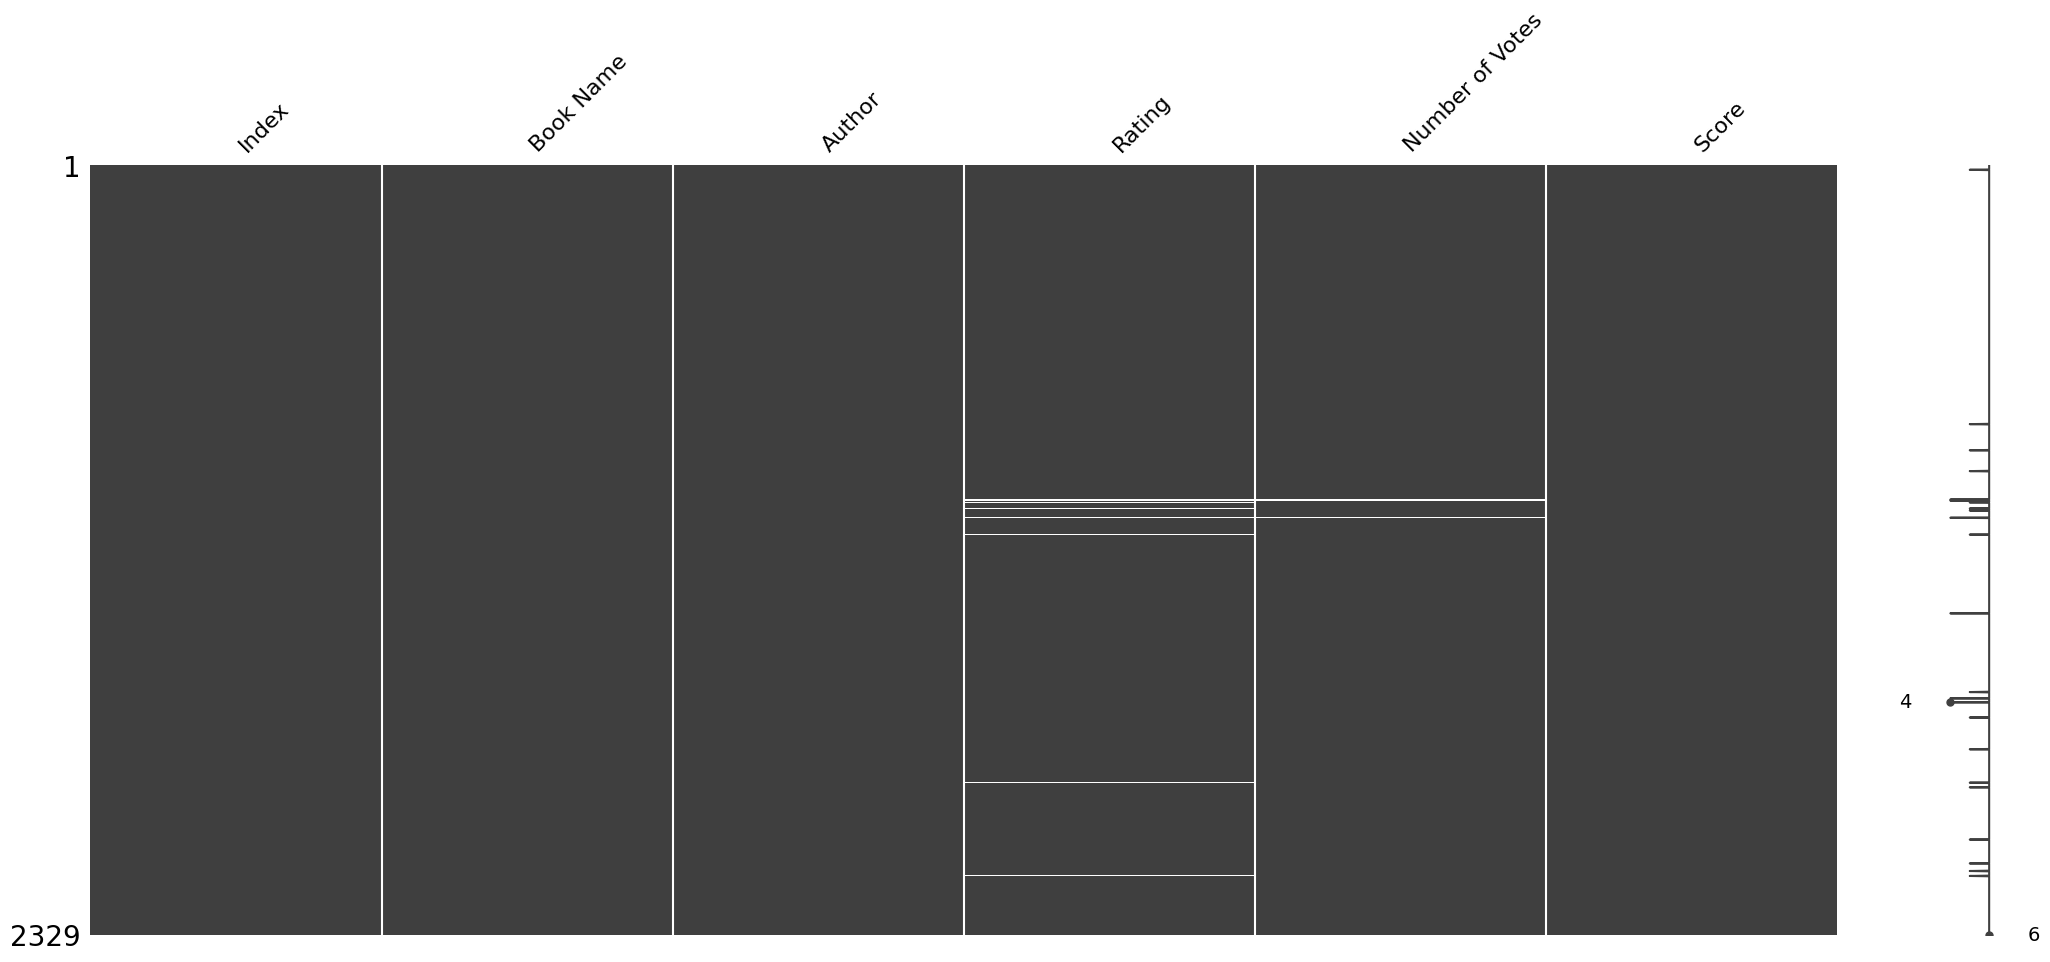

In [11]:
msno.matrix(df)

# Analysis

## Book Ratings vs Number of Votes

In [12]:
import plotly.express as px

# Create a scatter plot
fig = px.scatter(
    df,
    x='Rating',
    y='Number of Votes',
    size='Score',
    color='Author',
    hover_name='Book Name',
    title='<b>Book Ratings vs Number of Votes<b>',
    labels={'Rating': 'Book Rating', 'Number of Votes': 'Votes'},
    size_max=60
)

# Show the plot
fig.show()


## Satisfaction of Books

In [13]:
def rating_category(r):
    if r < 2:
        return 'Not Good'
    elif 2 <= r < 3:
        return 'Good'
    elif 3 <= r < 4:
        return 'Neutral'
    elif 4 <= r < 4.5:
        return 'Satisfy'
    else:
        return 'Very Satisfy'

# Apply the function to the 'Rating' column
df['Satisfaction'] = df['Rating'].apply(rating_category)


In [14]:
fig = px.scatter(
    df,
    x='Rating',
    y='Number of Votes',
    color='Author',
    size='Score',
    size_max=60,
    hover_name='Author',
    facet_col='Satisfaction',
)

fig.update_layout(
    width=1500,
    height=500,
    title='Satisfaction of Books',
)
fig.show()

In [15]:
df.groupby(['Satisfaction'], as_index=True)['Book Name'].count() 

Satisfaction
Good               7
Neutral          983
Satisfy         1181
Very Satisfy     158
Name: Book Name, dtype: int64

In [16]:
fig = px.histogram(
    df,
    x='Score',
    color=df['Satisfaction'],
    title=''
)

fig.show()

# Conclusion  

<div class="alert alert-block alert-info">
<b>Insights : </b>

 <b>Top book</b> - Fourth Wing(Author: Rebecca Yarros, Rating:4.5) 
 
The midnight Libary (Author: Matt Haig, Rating:3.99)
</div>